In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

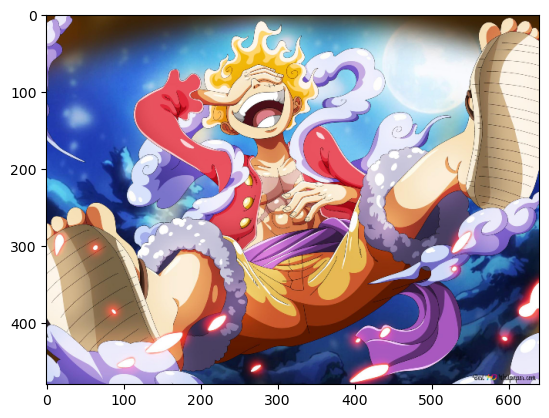

In [5]:
img_path = 'C:\\img\\luffy.jpg'
luffy = cv2.imread(img_path)
luffy_bgr = cv2.resize(luffy,(640,480))
luffy_rgb = cv2.cvtColor(luffy_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(luffy_rgb)

## 平均化ぼかし処理cv2.blur()し，それぞれ表示してください． kernel size：(5, 5), (15, 15), (35, 35)

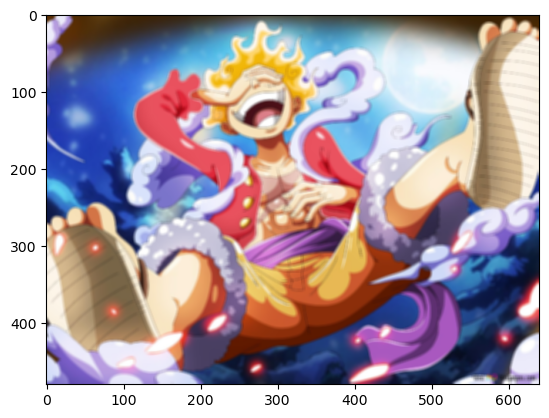

In [7]:
luffy_blur1 = cv2.blur(luffy_rgb,(5,5))
plt.imshow(luffy_blur1)

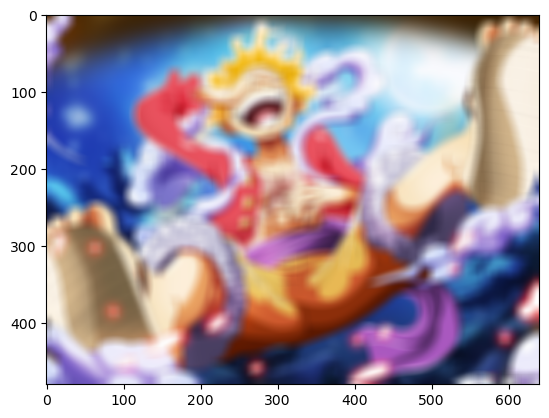

In [8]:
luffy_blur2 = cv2.blur(luffy_rgb,(15,15))
plt.imshow(luffy_blur2)

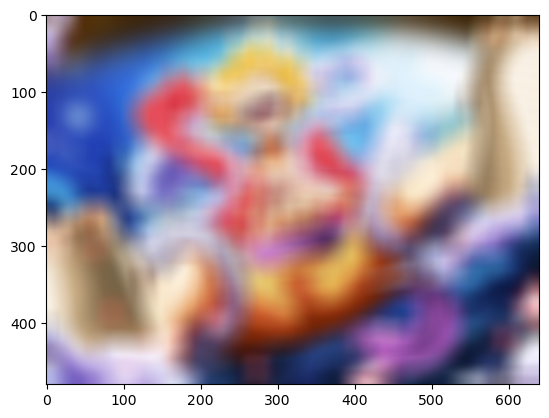

In [9]:
luffy_blur3 = cv2.blur(luffy_rgb,(35,35))
plt.imshow(luffy_blur3)

## cv2.medianBlur()  を用いて，ぼかし処理し，それぞれ表示してください．  kernel size：5, 15, 35 

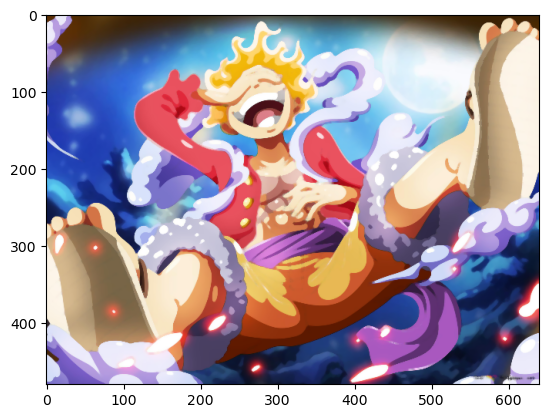

In [10]:
luffy_medianblur1 = cv2.medianBlur(luffy_rgb,5)
plt.imshow(luffy_medianblur1)

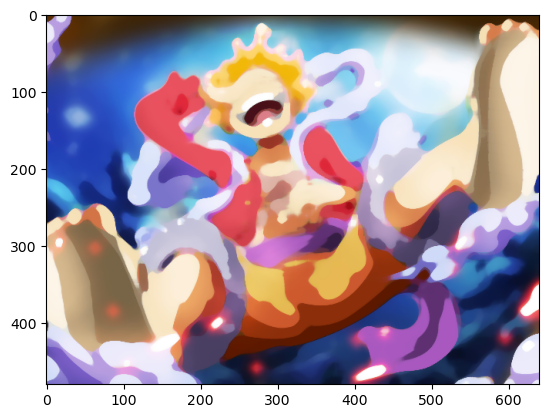

In [11]:
luffy_medianblur2 = cv2.medianBlur(luffy_rgb,15)
plt.imshow(luffy_medianblur2)

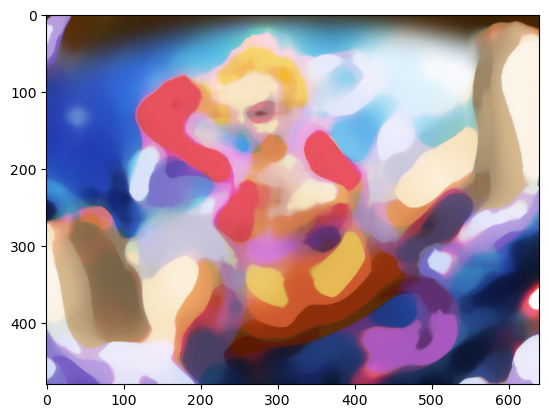

In [12]:
luffy_medianblur3 = cv2.medianBlur(luffy_rgb,35)
plt.imshow(luffy_medianblur3)

## GaussianBlur について調べ（ノートやコードのコメントにメモを取るとよい）， cv2.GaussianBlur()  を用いて，ぼかし処理し，それぞれ表示してください． kernel size：(5, 5), (15, 15), (35, 35), sigmaX：0

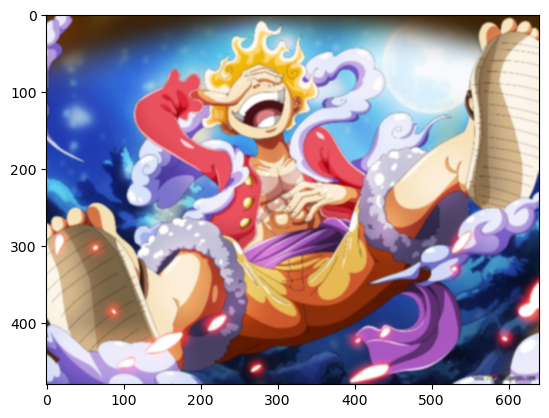

In [13]:
luffy_gaussianblur1 = cv2.GaussianBlur(luffy_rgb,(5,5),sigmaX = 0)
plt.imshow(luffy_gaussianblur1)

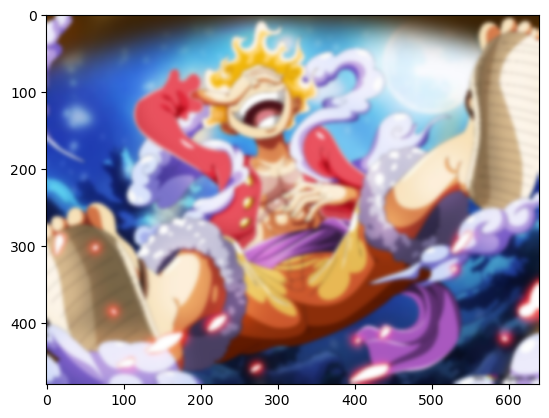

In [14]:
luffy_gaussianblur2 = cv2.GaussianBlur(luffy_rgb,(15,15),sigmaX = 0)
plt.imshow(luffy_gaussianblur2)

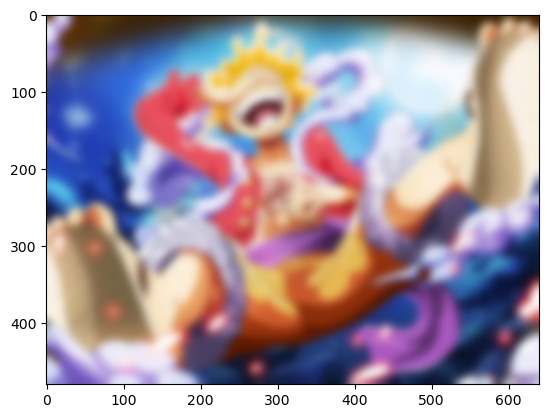

In [15]:
luffy_gaussianblur3 = cv2.GaussianBlur(luffy_rgb,(35,35),sigmaX = 0)
plt.imshow(luffy_gaussianblur3)

## cv2.blur を用いて，kernel size を 3～33（奇数のみ）と変化させて， それぞれ保存してください

In [22]:
for i in range(3,34):
    if i%2 == 1:
        luffy_blur = cv2.blur(luffy_rgb,(i,i))
        cv2.imwrite('C:\\img\\luffy_blur'+str(i)+'.jpg',luffy_blur)  

## NumPy で 501×501 のランダムに値を入れた画像を作成し，(np.random.randint()) しきい値で二値化を行い，中心に半径 150 の円を描き，ノイズ削除をしてください．

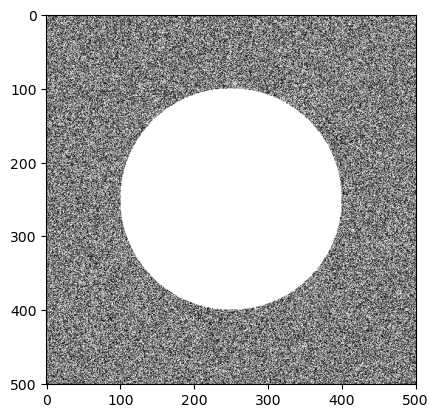

In [91]:
img = np.random.randint(0,255,size=(501,501),dtype = np.uint8)
cv2.circle(img,(250,250),150,(255,255,255),-1)
plt.imshow(img,cmap="gray")


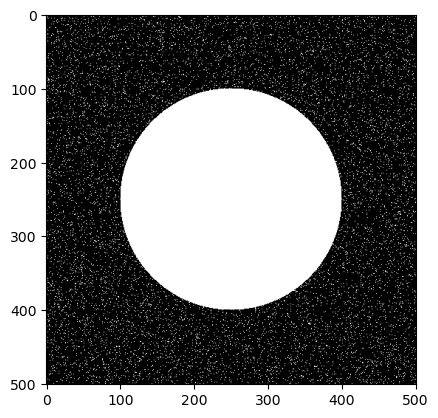

In [121]:
ret, img_thresh = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh,"gray")

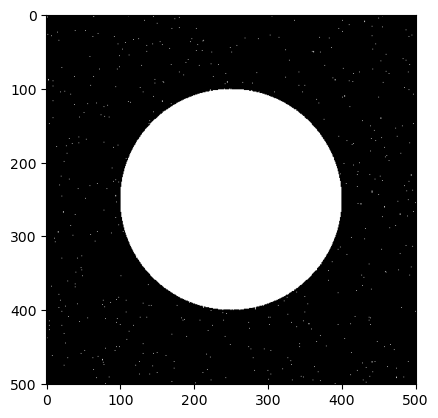

In [122]:
img_erode = cv2.erode(img_thresh,(17,17),iterations = 1)
plt.imshow(img_erode,"gray")

## carinsnow.jpg を用いて， Gray -> Blur -> Thresh -> Erode -> Dilate の順に処理を行い，車を検出してください．

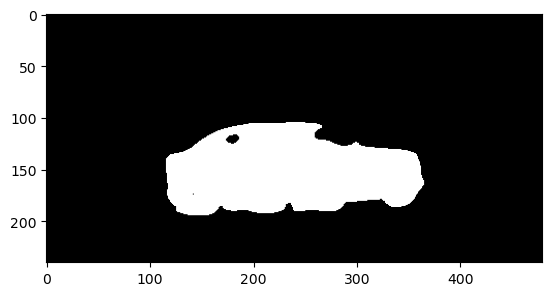

In [123]:
img = cv2.imread("C:\\img\\carinsnow.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray_blur = cv2.blur(img_gray,(11,11))
ret,img_thresh = cv2.threshold(img_gray_blur,127,255,cv2.THRESH_BINARY_INV)
img_erode = cv2.erode(img_thresh,(11,11))
img_dilate = cv2.dilate(img_erode,(5,5))
plt.imshow(img_dilate,cmap="gray")


## carinsnow2.jpg を用いて，車の検出をしてください．

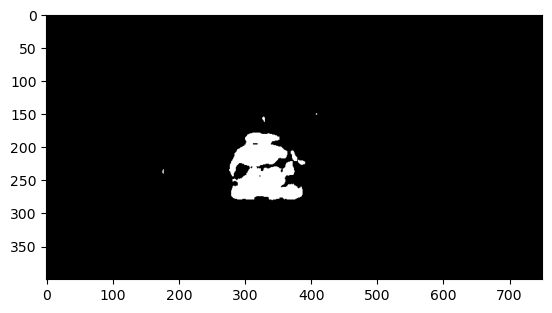

In [128]:
img = cv2.imread("C:\\img\\carinsnow2.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray_blur = cv2.blur(img_gray,(11,11))
ret,img_thresh = cv2.threshold(img_gray_blur,127,255,cv2.THRESH_BINARY_INV)
img_erode = cv2.erode(img_thresh,(11,11))
img_dilate = cv2.dilate(img_erode,(5,5))
img_dilate[0:350,600:800]=0
img_dilate[0:350,0:100]=0
img_dilate[100:150,400:500]=0
plt.imshow(img_dilate,cmap="gray")